# Biology Assignment 2

In [1]:
#Packages
import random
import numpy as np
import Bio 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as solve
from collections import Counter


## TASK 1

T = 100000


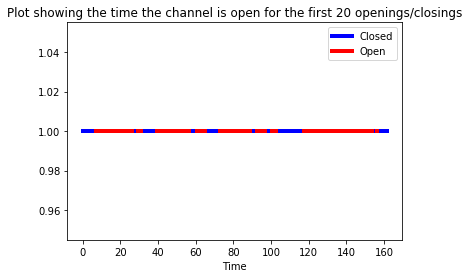

Estimate of average open time: 3.344005006874613 Actual : 3.3333333333333335
Estimate of average close time: 10.032015020623838 Actual : 10.0


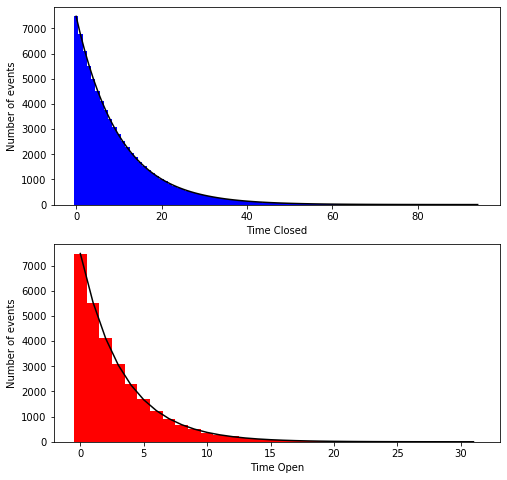

In [5]:
T = 100000
t=0
print('T =', T)

kp = 0.1
kn = 0.3

TO = []
TC = []

countC = Counter()
countO = Counter()

high_C = 0
high_O = 0

while t < T:
    r = random.random()

    tc = 1/kp * np.log(1/r)
    to = 1/kn * np.log(1/r)
    
    TC.append(tc)
    TO.append(to)
    
    high_C = max(high_C, int(np.floor(tc)))
    high_O = max(high_O, int(np.floor(to)))
    
    for i in range(int(np.floor(tc))+1):
        countC[str(i)] += 1
       
    for j in range(int(np.floor(to))+1):
        countO[str(j)] += 1
        
    t += tc + to
    
time = [0]
for i in range(len(TC)):
    time.append(time[-1] + TO[i])
    time.append(time[-1] + TC[i])

#Only plotting the first 20 points 
for i in range(1,20):
    if i%2 == 0:
        plt.plot([time[i-1],time[i]],[1,1], color='red',linewidth=4)
    else:
        plt.plot([time[i-1],time[i]],[1,1], color='blue',linewidth=4)

plt.legend(['Closed','Open']) 
plt.xlabel('Time')
plt.title('Plot showing the time the channel is open for the first 20 openings/closings')
plt.show()

#Part B
E_to = 1/kn
E_tc = 1/kp

print('Estimate of average open time:', np.mean(TO),'Actual :', E_to)
print('Estimate of average close time:', np.mean(TC),'Actual :', E_tc)

#Part C

expC = []
expO = []
for tau in range(high_C + 1):
    expC.append(float(np.exp(-kp * tau))*len(TC))

for tau in range(high_O + 1):
    expO.append(float(np.exp(-kn * tau))*len(TO))

tC = np.linspace(0,high_C,high_C+1)
tO = np.linspace(0,high_O,high_O+1)

labels1, values1 = zip(*countC.items())
labels2, values2 = zip(*countO.items())

width=1

indexe1 = np.arange(len(labels1))
indexe2 = np.arange(len(labels2))

fig, ax = plt.subplots(2, figsize=(8,8))
plt.subplot(2,1,1,label='Closed')
plt.xlabel('Time Closed')
plt.ylabel('Number of events')
plt.bar(indexe1, values1, width,color='blue')
plt.plot(tC,expC,color='black')
plt.subplot(2,1,2,label='Open')
plt.xlabel('Time Open')
plt.ylabel('Number of events')
plt.bar(indexe2, values2, width,color='red')
plt.plot(tO,expO,color='black')
plt.show()


## TASK 2

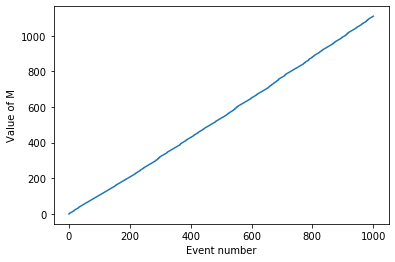

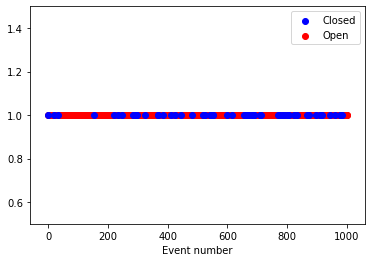

In [4]:
kp = 0.1
kn = 0.3

#Starts off closed so C = 1 and O = 0 to represent this.
C = 1
O = 0

#To plot open and closed time
c = [1]
o = [0]

#Time counter
T = []
T.append(0)

count = [0]
m=[0]

M = 0
while M < 1000:

    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O

    alpha = [a1,a2,a3]
    
    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)

    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        c.append(C)
        o.append(O)
        m.append(m[-1])
        count.append(count[-1]+1)
    
    if j == 2:
        O-=1
        C+=1
        c.append(C)
        o.append(O)
        m.append(m[-1])
        count.append(count[-1]+1)
        
    if j == 3:
        c.append(C)
        o.append(O)
        M+=1
        m.append(m[-1]+1)
        count.append(count[-1]+1)

plt.plot(m, count)
plt.xlabel('Event number')
plt.ylabel('Value of M')
plt.show()

o1=plt.scatter(m,o,color='red')
c1=plt.scatter(m,c,color='blue')
plt.ylim((0.5,1.5))
plt.legend((c1, o1), ('Closed', 'Open'))
plt.xlabel('Event number')
plt.show()

## TASK 3

### A

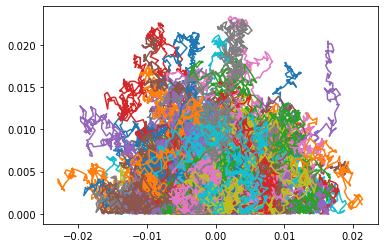

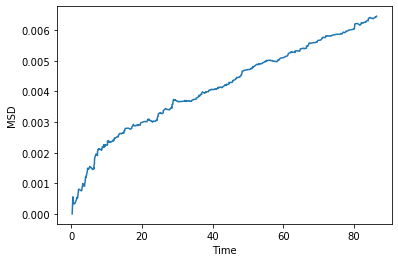

In [19]:
#Initialising variables
D = 5e-6

kp = 0.1
kn = 0.3

#The states of the gate ie currently it is closed
C = 1
O = 0

#Time of each event
T = [0]

#A list containing the number of ions after each random event 
m=[0]

M = 0

while M < 1000:
    
    #Values of alphas given in assignment
    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O
    
    
    alpha = [a1,a2,a3]

    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)
    
    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        m.append(m[-1])

    if j == 2:
        O-=1
        C+=1
        m.append(m[-1])

    if j == 3:
        M+=1
        m.append(m[-1]+1)

#Calculates how many events where needed to get 500 ions in.        
j=0
while m[j] != 500:
    j+=1

#Creares a vector of cumulative time of each time a ion enters
time = [0]
k=0
while k < j:
    if m[k] != m[k+1]:
        time.append(time[-1]+T[k])
        k+=1
    else:
        s=0
        while m[k] == m[k+s]:
            s += 1
        k+=s
        t=time[-1]
        for i in range(s):
            time.append(t+sum(T[k:k+s]))

positions=[]          
#A loop that repeats until 500 ions have entered
j=0
while m[j] != 500:
    j+=1
    #Initialising the co-ordinates for each of the 500 ions.
    X = [0]
    Y = [0]
    if m[j-1] != m[j]:
        for e in range(1,j):
            #random.random() -0.5 so the particel can move in all directions
            X.append(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(random.random()-0.5))
            Y.append(abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(random.random()-0.5)))
        positions.append([X[-1],Y[-1]])
        plt.plot(X,Y)

plt.show()

times = []
for i in range(len(time)):
    if time[i-1] != time[i]:
        times.append(time[i])


distance = []
for i in range(len(positions)):
    #As starting point is (0,0) no need to include it in Euclidean distance 
    distance.append(np.sqrt(positions[i][1]**2+positions[i][1]**2))

msd = [0]
for i in range(1, len(distance)):
    msd.append(1/i*sum(distance[:i]))


plt.plot(times[1:],msd)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.show()

### B

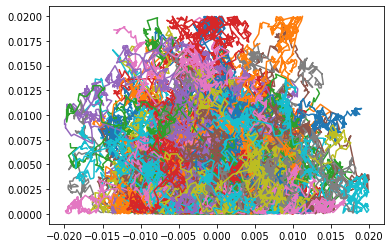

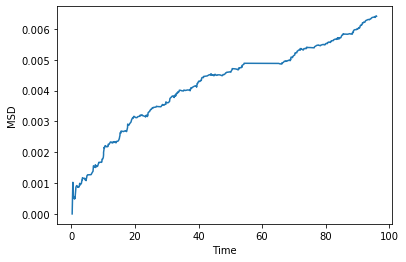

In [17]:
#Initialising variables
D = 5e-6

kp = 0.1
kn = 0.3

#The states of the gate ie currently it is closed
C = 1
O = 0

#Time of each event
T = [0]

#A list containing the number of ions after each random event 
m=[0]

M = 0

while M < 1000:
    
    #Values of alphas given in assignment
    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O
    
    
    alpha = [a1,a2,a3]

    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)
    
    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        m.append(m[-1])

    if j == 2:
        O-=1
        C+=1
        m.append(m[-1])

    if j == 3:
        M+=1
        m.append(m[-1]+1)

#Calculates how many events where needed to get 500 ions in.        
j=0
while m[j] != 500:
    j+=1

#Creares a vector of cumulative time of each time a ion enters
time = [0]
k=0
while k < j:
    if m[k] != m[k+1]:
        time.append(time[-1]+T[k])
        k+=1
    else:
        s=0
        while m[k] == m[k+s]:
            s += 1
        k+=s
        t=time[-1]
        for i in range(s):
            time.append(t+sum(T[k:k+s]))

            
positions=[]          
#A loop that repeats until 500 ions have entered
j=0
while m[j] != 500:
    j+=1
    #Initialising the co-ordinates for each of the 500 ions.
    X = [0]
    Y = [0]
    if m[j-1] != m[j]:
        for e in range(1,j):
            #Random number to move the molecule
            Xr = random.random()
            Yr = random.random()
            
            #random.random() -0.5 so the particel can move in all directions

            #X co-ordinates
            if X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5) < -0.02: 
                X.append(-0.02 + abs(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5)+0.02))
            elif X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5) > 0.02:
                X.append(0.02 - abs(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5)-0.02))
            else:
                X.append(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5))

            #Y co-ordinates
            if Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5) > 0.02:
                Y.append(0.02 - abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5)-0.02))
            elif Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5) < 0:
                Y.append(abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5)))      
            else:
                Y.append(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5))
        positions.append([X[-1],Y[-1]])
        plt.plot(X,Y)

plt.show()

times = []
for i in range(len(time)):
    if time[i-1] != time[i]:
        times.append(time[i])

#This calculates the distance between the ion and the origin after the 500 ions have entred
distance = []
for i in range(len(positions)):
    #As starting point is (0,0) no need to include it in Euclidean distance 
    distance.append(np.sqrt(positions[i][1]**2 + positions[i][1]**2))

#Calculates the msd
msd = [0]
for i in range(1, len(distance)):
    msd.append(1/i*sum(distance[:i]))


plt.plot(times[1:],msd)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.show()

### C

In [7]:
#I've included it in the code for each of a and b

## TASK 4

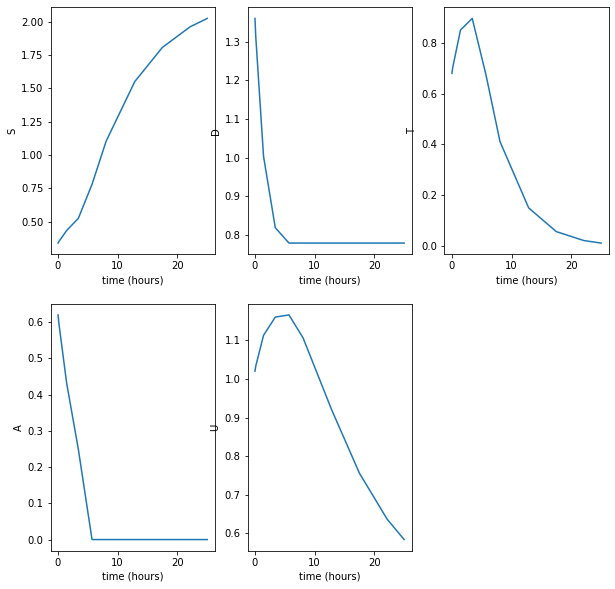

In [8]:
T_0 = 0.68
D_0 = 1.36
S_0 = 0.34
kai_A = 1.3
K = 0.43

k0 = {'UT': 0, 'TD': 0, 'SD': 0, 'US': 0, 'TU': 0.21, 'DT': 0, 'DS': 0.31, 'SU': 0.11}
kA = {'UT': 0.479077, 'TD': 0.212923 , 'SD': 0.505692, 'US': 0.0532308, 'TU': 0.0798462, 
      'DT': 0.173, 'DS': -0.319385, 'SU': -0.133077}

def k(st, S):
    return k0[st] + (kA[st]* max(0, kai_A-2*S))/(K + max(0, kai_A- 2*S))

def func(t, r):
    
    S, D, T = r
    U = 3.4 - S - D - T
    
    dS = k('US', S)*U + k('DS', S)*D - k('SU', S)*S - k('SD', S)*S 
    dD = k('DT', S)*T + k('SD', S)*S - k('DT', S)*D - k('SD', S)*D 
    dT = k('UT', S)*U + k('DT', S)*D - k('TU', S)*T - k('DT', S)*T
    return dS, dD, dT

sol = solve(func, [0,25], [S_0, D_0, T_0]) 
solS, solD, solT = sol.y

solU = []
solA = []
for i in range(len(solS)):
    solU.append(3.4-solS[i]-solD[i]-solT[i])
    solA.append(max(0, kai_A - 2*solS[i]))

#Plots
plt.subplots(5, figsize=(10,10))

labels = ['S', 'D', 'T', 'A', 'U']
plot = [sol.y[0,:],sol.y[1,:],sol.y[2,:],solA,solU]
for i in range(len(plot)):
    plt.subplot(2,3,i+1, xlabel='time (hours)', ylabel=labels[i])
    plt.plot(sol.t, plot[i])
plt.show()


T = 100000


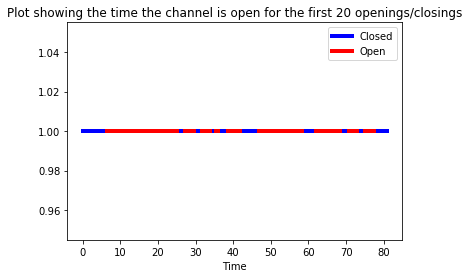

Estimate of average open time: 3.3477960827989803 Actual : 3.3333333333333335
Estimate of average close time: 10.043388248396937 Actual : 10.0


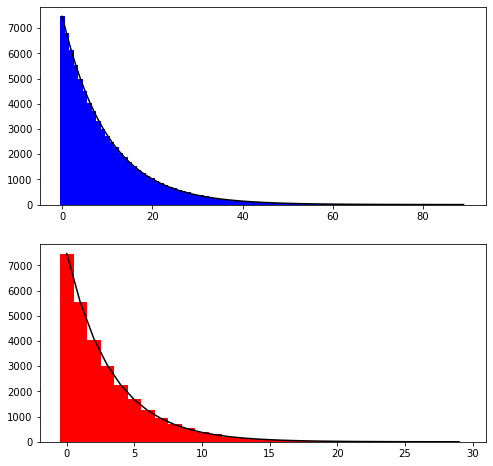

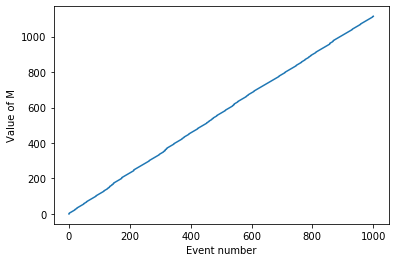

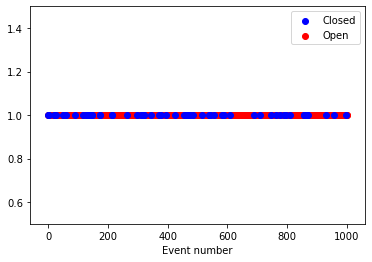

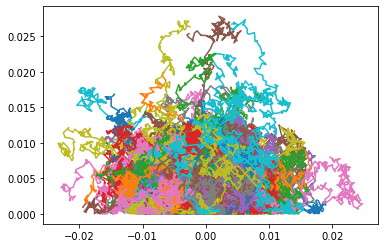

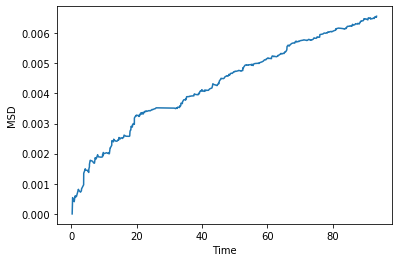

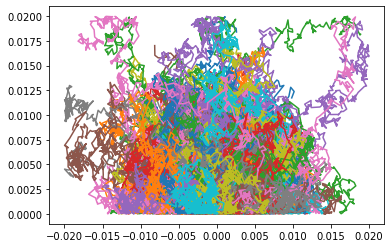

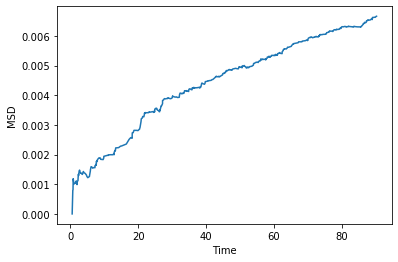

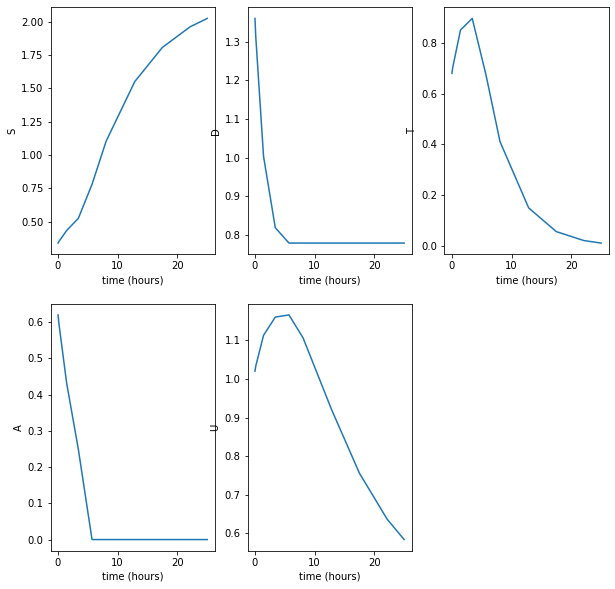

In [2]:
#Biolgy Assignment 2
#Packages

import random
import numpy as np
import Bio 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp as solve
from collections import Counter

#Task 1

T = 100000
t=0
print('T =', T)

kp = 0.1
kn = 0.3

TO = []
TC = []

countC = Counter()
countO = Counter()

high_C = 0
high_O = 0

while t < T:
    r = random.random()

    tc = 1/kp * np.log(1/r)
    to = 1/kn * np.log(1/r)
    
    TC.append(tc)
    TO.append(to)
    
    high_C = max(high_C, int(np.floor(tc)))
    high_O = max(high_O, int(np.floor(to)))
    
    for i in range(int(np.floor(tc))+1):
        countC[str(i)] += 1
       
    for j in range(int(np.floor(to))+1):
        countO[str(j)] += 1
        
    t += tc + to
    
time = [0]
for i in range(len(TC)):
    time.append(time[-1] + TO[i])
    time.append(time[-1] + TC[i])

#Only plotting the first 20 points 
for i in range(1,20):
    if i%2 == 0:
        plt.plot([time[i-1],time[i]],[1,1], color='red',linewidth=4)
    else:
        plt.plot([time[i-1],time[i]],[1,1], color='blue',linewidth=4)

plt.legend(['Closed','Open']) 
plt.xlabel('Time')
plt.title('Plot showing the time the channel is open for the first 20 openings/closings')
plt.show()

#Part B
E_to = 1/kn
E_tc = 1/kp

print('Estimate of average open time:', np.mean(TO),'Actual :', E_to)
print('Estimate of average close time:', np.mean(TC),'Actual :', E_tc)

#Part C

expC = []
expO = []
for tau in range(high_C + 1):
    expC.append(float(np.exp(-kp * tau))*len(TC))

for tau in range(high_O + 1):
    expO.append(float(np.exp(-kn * tau))*len(TO))

tC = np.linspace(0,high_C,high_C+1)
tO = np.linspace(0,high_O,high_O+1)

labels1, values1 = zip(*countC.items())
labels2, values2 = zip(*countO.items())

width=1

indexe1 = np.arange(len(labels1))
indexe2 = np.arange(len(labels2))

fig, ax = plt.subplots(2, figsize=(8,8))
plt.subplot(2,1,1,label='Closed')
plt.bar(indexe1, values1, width,color='blue')
plt.plot(tC,expC,color='black')
plt.subplot(2,1,2,label='Open')
plt.bar(indexe2, values2, width,color='red')
plt.plot(tO,expO,color='black')
plt.show()

#task 2

kp = 0.1
kn = 0.3

#Starts off closed so C = 1 and O = 0 to represent this.
C = 1
O = 0

#To plot open and closed time
c = [1]
o = [0]

#Time counter
T = []
T.append(0)

count = [0]
m=[0]

M = 0
while M < 1000:

    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O

    alpha = [a1,a2,a3]
    
    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)

    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        c.append(C)
        o.append(O)
        m.append(m[-1])
        count.append(count[-1]+1)
    
    if j == 2:
        O-=1
        C+=1
        c.append(C)
        o.append(O)
        m.append(m[-1])
        count.append(count[-1]+1)
        
    if j == 3:
        c.append(C)
        o.append(O)
        M+=1
        m.append(m[-1]+1)
        count.append(count[-1]+1)

plt.plot(m, count)
plt.xlabel('Event number')
plt.ylabel('Value of M')
plt.show()

o1=plt.scatter(m,o,color='red')
c1=plt.scatter(m,c,color='blue')
plt.ylim((0.5,1.5))
plt.legend((c1, o1), ('Closed', 'Open'))
plt.xlabel('Event number')
plt.show()

#Task 3
#A

#Initialising variables
D = 5e-6

kp = 0.1
kn = 0.3

#The states of the gate ie currently it is closed
C = 1
O = 0

#Time of each event
T = [0]

#A list containing the number of ions after each random event 
m=[0]

M = 0

while M < 1000:
    
    #Values of alphas given in assignment
    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O
    
    
    alpha = [a1,a2,a3]

    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)
    
    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        m.append(m[-1])

    if j == 2:
        O-=1
        C+=1
        m.append(m[-1])

    if j == 3:
        M+=1
        m.append(m[-1]+1)

#Calculates how many events where needed to get 500 ions in.        
j=0
while m[j] != 500:
    j+=1

#Creares a vector of cumulative time of each time a ion enters
time = [0]
k=0
while k < j:
    if m[k] != m[k+1]:
        time.append(time[-1]+T[k])
        k+=1
    else:
        s=0
        while m[k] == m[k+s]:
            s += 1
        k+=s
        t=time[-1]
        for i in range(s):
            time.append(t+sum(T[k:k+s]))

positions=[]          
#A loop that repeats until 500 ions have entered
j=0
while m[j] != 500:
    j+=1
    #Initialising the co-ordinates for each of the 500 ions.
    X = [0]
    Y = [0]
    if m[j-1] != m[j]:
        for e in range(1,j):
            #random.random() -0.5 so the particel can move in all directions
            X.append(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(random.random()-0.5))
            Y.append(abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(random.random()-0.5)))
        positions.append([X[-1],Y[-1]])
        plt.plot(X,Y)

plt.show()

times = []
for i in range(len(time)):
    if time[i-1] != time[i]:
        times.append(time[i])


distance = []
for i in range(len(positions)):
    #As starting point is (0,0) no need to include it in Euclidean distance 
    distance.append(np.sqrt(positions[i][1]**2+positions[i][1]**2))

msd = [0]
for i in range(1, len(distance)):
    msd.append(1/i*sum(distance[:i]))


plt.plot(times[1:],msd)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.show()

#B

#Initialising variables
D = 5e-6

kp = 0.1
kn = 0.3

#The states of the gate ie currently it is closed
C = 1
O = 0

#Time of each event
T = [0]

#A list containing the number of ions after each random event 
m=[0]

M = 0

while M < 1000:
    
    #Values of alphas given in assignment
    a1 = kp*C
    a2 = kn*O
    a3 = 5*1.2*O
    
    
    alpha = [a1,a2,a3]

    r1 = random.random()
    r2 = random.random()

    #Time of the next event
    tau = 1/sum(alpha) * np.log(1/r1)
    T.append(tau)
    
    #Type of the next event
    value = 0
    j = 0
    while r2 > value:
        j+=1
        value = 1/sum(alpha) * sum(alpha[:j])

    #result of the event 
    if j == 1:
        O+=1
        C-=1
        m.append(m[-1])

    if j == 2:
        O-=1
        C+=1
        m.append(m[-1])

    if j == 3:
        M+=1
        m.append(m[-1]+1)

#Calculates how many events where needed to get 500 ions in.        
j=0
while m[j] != 500:
    j+=1

#Creares a vector of cumulative time of each time a ion enters
time = [0]
k=0
while k < j:
    if m[k] != m[k+1]:
        time.append(time[-1]+T[k])
        k+=1
    else:
        s=0
        while m[k] == m[k+s]:
            s += 1
        k+=s
        t=time[-1]
        for i in range(s):
            time.append(t+sum(T[k:k+s]))

            
positions=[]          
#A loop that repeats until 500 ions have entered
j=0
while m[j] != 500:
    j+=1
    #Initialising the co-ordinates for each of the 500 ions.
    X = [0]
    Y = [0]
    if m[j-1] != m[j]:
        for e in range(1,j):
            #Random number to move the molecule
            Xr = random.random()
            Yr = random.random()
            
            #random.random() -0.5 so the particel can move in all directions

            #X co-ordinates
            if X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5) < -0.02: 
                X.append(-0.02 + abs(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5)+0.02))
            elif X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5) > 0.02:
                X.append(0.02 - abs(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5)-0.02))
            else:
                X.append(X[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Xr-0.5))

            #Y co-ordinates
            if Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5) > 0.02:
                Y.append(0.02 - abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5)-0.02))
            elif Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5) < 0:
                Y.append(abs(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5)))      
            else:
                Y.append(Y[-1] + np.sqrt(2*D*(time[e]-time[e-1]))*(Yr-0.5))
        positions.append([X[-1],Y[-1]])
        plt.plot(X,Y)

plt.show()

times = []
for i in range(len(time)):
    if time[i-1] != time[i]:
        times.append(time[i])

#This calculates the distance between the ion and the origin after the 500 ions have entred
distance = []
for i in range(len(positions)):
    #As starting point is (0,0) no need to include it in Euclidean distance 
    distance.append(np.sqrt(positions[i][1]**2 + positions[i][1]**2))

#Calculates the msd
msd = [0]
for i in range(1, len(distance)):
    msd.append(1/i*sum(distance[:i]))


plt.plot(times[1:],msd)
plt.xlabel('Time')
plt.ylabel('MSD')
plt.show()

#C
#I've included it in the code for each of a and b

#Task 4

T_0 = 0.68
D_0 = 1.36
S_0 = 0.34
kai_A = 1.3
K = 0.43

k0 = {'UT': 0, 'TD': 0, 'SD': 0, 'US': 0, 'TU': 0.21, 'DT': 0, 'DS': 0.31, 'SU': 0.11}
kA = {'UT': 0.479077, 'TD': 0.212923 , 'SD': 0.505692, 'US': 0.0532308, 'TU': 0.0798462, 
      'DT': 0.173, 'DS': -0.319385, 'SU': -0.133077}

def k(st, S):
    return k0[st] + (kA[st]* max(0, kai_A-2*S))/(K + max(0, kai_A- 2*S))

def func(t, r):
    
    S, D, T = r
    U = 3.4 - S - D - T
    
    dS = k('US', S)*U + k('DS', S)*D - k('SU', S)*S - k('SD', S)*S 
    dD = k('DT', S)*T + k('SD', S)*S - k('DT', S)*D - k('SD', S)*D 
    dT = k('UT', S)*U + k('DT', S)*D - k('TU', S)*T - k('DT', S)*T
    return dS, dD, dT

sol = solve(func, [0,25], [S_0, D_0, T_0]) 
solS, solD, solT = sol.y

solU = []
solA = []
for i in range(len(solS)):
    solU.append(3.4-solS[i]-solD[i]-solT[i])
    solA.append(max(0, kai_A - 2*solS[i]))

#Plots
plt.subplots(5, figsize=(10,10))

labels = ['S', 'D', 'T', 'A', 'U']
plot = [sol.y[0,:],sol.y[1,:],sol.y[2,:],solA,solU]
for i in range(len(plot)):
    plt.subplot(2,3,i+1, xlabel='time (hours)', ylabel=labels[i])
    plt.plot(sol.t, plot[i])
plt.show()
